In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import sys
import os
current_dir = os.getcwd()
github_path = os.path.abspath(os.path.join(current_dir, "../../"))
sys.path.append(github_path)
from plot_utils import *

# Weight of Evidence Visualization

## Random Data Generation and Categorization

This algorithm generates 200 random normalized values between 0 and 1 and classifies them into two groups based on binary outcomes (0 or 1). The outcomes are determined by a probability derived from a sigmoid function applied to each value.

The algorithm performs the following steps:
1. **Data Generation**: Creates random values and computes probabilities using the sigmoid function.
2. **Outcome Generation**: Assigns binary outcomes (0 or 1) based on the calculated probabilities.
3. **Categorization**: Segregates values into two groups based on the outcomes.
4. **Bad Value Counting**: Identifies and counts "bad" values in each group based on specified thresholds.
5. **Data Truncation**: Truncates the groups based on the counts of bad values, filtering the data for analysis.

The final output consists of truncated lists of generated values for further analysis or visualization.

In [3]:
def generate_random_data(n_samples):
    """Generate random normalized data and corresponding binary outcomes."""
    xrands0_orig = []
    yrands0_orig = []
    xrands1_orig = []
    yrands1_orig = []

    for _ in range(n_samples):
        xrand_raw = random.randint(0, 100)  # Generate a random integer between 0 and 100
        xrand = xrand_raw / 100.0  # Normalize to [0, 1]
        p = 1 / (1 + np.exp(-(8 * (xrand - 0.5))))  # Calculate probability using the sigmoid function
        yrand = random.choices([1, 0], weights=[p, 1 - p], k=1)[0]  # Generate binary outcome based on probability

        # Append to the respective lists based on the outcome
        if yrand == 0:
            xrands0_orig.append(xrand)
            yrands0_orig.append(yrand)
        else:
            xrands1_orig.append(xrand)
            yrands1_orig.append(yrand)

    return xrands0_orig, yrands0_orig, xrands1_orig, yrands1_orig

def count_bad_values(data, threshold, condition='less'):
    """Count bad values in a list based on a threshold."""
    count = 0
    for value in data:
        if (condition == 'less' and value < threshold) or (condition == 'greater' and value > threshold):
            count += 1
        else:
            break  # Stop counting when the condition is not met
    return count

def truncate_data(original_data, bad_count):
    """Truncate data based on bad counts."""
    if bad_count == 0:
        return original_data  # No truncation needed
    else:
        return original_data[:-bad_count]  # Truncate from the end

# Main execution
n_samples = 200
xrands0_orig, yrands0_orig, xrands1_orig, yrands1_orig = generate_random_data(n_samples)

# Sort the results
xrands0_orig.sort()
xrands1_orig.sort()

# Count "bad" values for visualization purposes
bad_cnt_0 = count_bad_values(xrands0_orig[::-1], 0.9, condition='greater')  # Count for > 0.9
bad_cnt_1 = count_bad_values(xrands1_orig, 0.1, condition='less')  # Count for < 0.1

# Truncate the original lists based on bad counts
xrands0 = truncate_data(xrands0_orig, bad_cnt_0)
yrands0 = truncate_data(yrands0_orig, bad_cnt_0)
xrands1 = truncate_data(xrands1_orig, bad_cnt_1)
yrands1 = truncate_data(yrands1_orig, bad_cnt_1)

# Output the results for verification
print("Truncated xrands0:", xrands0)
print("Truncated xrands1:", xrands1)
print("Truncated yrands0:", yrands0)
print("Truncated yrands1:", yrands1)


Truncated xrands0: [0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.04, 0.04, 0.04, 0.05, 0.06, 0.06, 0.07, 0.08, 0.09, 0.09, 0.1, 0.1, 0.11, 0.11, 0.11, 0.14, 0.14, 0.15, 0.16, 0.16, 0.18, 0.19, 0.19, 0.2, 0.2, 0.2, 0.21, 0.21, 0.21, 0.21, 0.23, 0.23, 0.24, 0.26, 0.26, 0.26, 0.28, 0.29, 0.29, 0.29, 0.3, 0.3, 0.3, 0.3, 0.31, 0.32, 0.32, 0.32, 0.32, 0.33, 0.33, 0.33, 0.34, 0.34, 0.38, 0.41, 0.41, 0.42, 0.42, 0.44, 0.44, 0.44, 0.46, 0.46, 0.47, 0.47, 0.48, 0.49, 0.5, 0.51, 0.51, 0.52, 0.52, 0.54, 0.57, 0.58, 0.65, 0.66, 0.66, 0.68, 0.69, 0.7, 0.78, 0.81, 0.86]
Truncated xrands1: [0.11, 0.13, 0.16, 0.22, 0.27, 0.33, 0.34, 0.37, 0.37, 0.38, 0.41, 0.42, 0.42, 0.43, 0.44, 0.45, 0.46, 0.46, 0.48, 0.49, 0.52, 0.52, 0.52, 0.52, 0.54, 0.54, 0.54, 0.55, 0.55, 0.57, 0.57, 0.6, 0.6, 0.61, 0.62, 0.63, 0.63, 0.64, 0.64, 0.65, 0.65, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.68, 0.68, 0.7, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.73, 0.74, 0.74, 0.74, 0.76, 0.76, 0.77, 0.77, 0.77, 0.78, 0.78, 0.78,

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1706/2085447594.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1706/2085447594.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


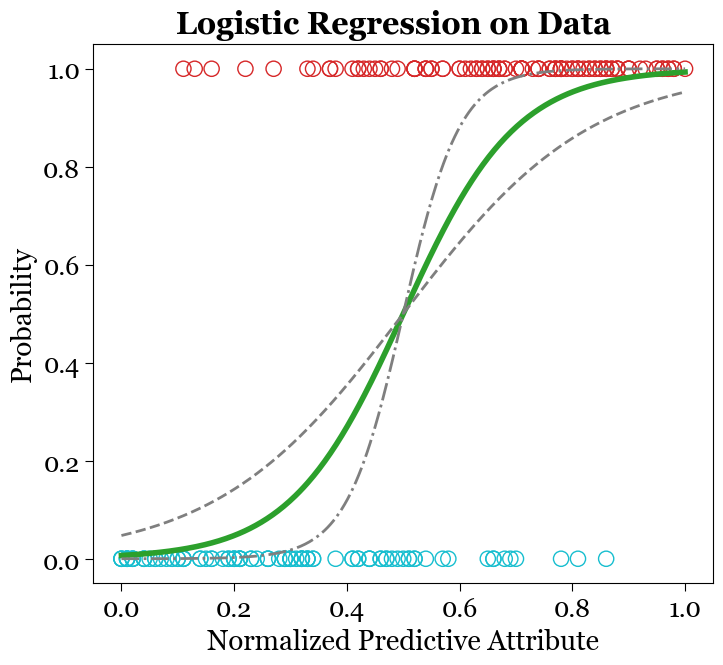

In [5]:
def sigmoid(x, scale):
    """Calculate the sigmoid function with a scaling factor."""
    return 1 / (1 + np.exp(-scale * (x - 0.5)))

def plot_sigmoids(x, scales, line_styles, colors, xrands0, yrands0, xrands1, yrands1):
    """Plot sigmoid functions and scatter data."""
    fig = plt.figure(figsize=(8, 7))
    ax = plt.gca()

    # Plot each sigmoid function with corresponding line style and color
    for scale, style, color in zip(scales, line_styles, colors):
        y = sigmoid(x, scale)
        plt.plot(x, y, linewidth=4 if scale == scales[0] else 2, color=color, linestyle=style)
    
    # Scatter plot for data points
    plt.scatter(xrands0, yrands0, s=120, edgecolors=tableau_colors[9], facecolors='none', marker='o')
    plt.scatter(xrands1, yrands1, s=120, edgecolors=tableau_colors[3], facecolors='none', marker='o')

    # Customize labels, title, and font
    font = {'family': 'Georgia', 'color': 'black', 'weight': 'normal', 'size': 20}
    plt.xlabel('Normalized Predictive Attribute', fontdict=font)
    plt.ylabel('Probability', fontdict=font)
    fig.suptitle('Logistic Regression on Data', fontproperties=suptitle_font, y=0.93)

    # Customize tick sizes
    ax.tick_params(axis='both', which='major', labelsize=18, length=6)
    ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
    ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

    # Display the plot
    # plt.savefig('./../plots/figures/logistic_regression_plot_without_woe.png', bbox_inches='tight')
    plt.show()
    
# Prepare data
x = np.linspace(0, 1, 400)
scales = [10, 20, 6]
line_styles = ['-', '-.', '--']
colors = [tableau_colors[2], tableau_colors[7], tableau_colors[7]]

# Call the plotting function
plot_sigmoids(x, scales, line_styles, colors, xrands0, yrands0, xrands1, yrands1)


## WoE and Log-Odds Before Binning

In [14]:
# Calculate original WoE and log-odds
data_dict_0 = Counter(xrands0)
data_dict_1 = Counter(xrands1)

lnodds = []
WoEs   = []

# Iterate through 101 points for normalized attribute values (0 to 1)
for i in range(101):
    num = i / 100
    count_0 = data_dict_0.get(num, 0)
    count_1 = data_dict_1.get(num, 0)
    
    if count_0 > 0 and count_1 > 0:
        ratio = count_0 / count_1
        lnodd = np.log(ratio)
        WoE = np.log((count_0 / len(xrands0)) / (count_1 / len(xrands1)))
    elif count_0 > 0:
        lnodd, WoE = 8, 8
    elif count_1 > 0:
        lnodd, WoE = -8, -8
    else:
        lnodd, WoE = np.nan, np.nan
    
    lnodds.append(lnodd)
    WoEs.append(WoE)

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3421/2586356489.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)


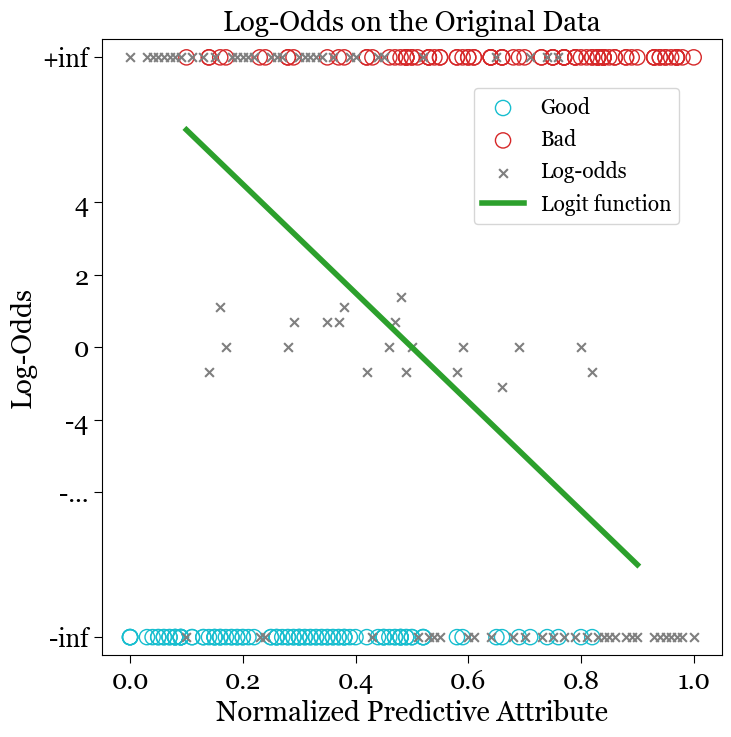

In [22]:
# Linear function for plotting
def linear1(x):
    return -15 * (x - 0.5)

# Prepare data for plotting
x = np.linspace(0.1, 0.9, 400)
y_lin = linear1(x)
yrands_ninf = [-8 for _ in xrands0]
yrands_pinf = [8 for _ in xrands1]
x_line = [i / 100 for i in range(101)]

# Plotting
f, ax = plt.subplots(1, 1, figsize=(8, 8))

# Scatter plot for good and bad labels
ax.scatter(xrands0, yrands_ninf, s=120, edgecolors=tableau_colors[9], facecolors='none', marker='o', label='Good')
ax.scatter(xrands1, yrands_pinf, s=120, edgecolors=tableau_colors[3], facecolors='none', marker='o', label='Bad')

# Set axis limits and labels
ax.set_ylim(-8.5, 8.5)
fig.suptitle('Logistic Regression on Data', fontproperties=suptitle_font, y=0.93)
ax.set_title('Log-Odds on the Original Data', fontdict=font)
ax.set_xlabel('Normalized Predictive Attribute', fontdict=font)
ax.set_ylabel('Log-Odds', fontdict=font)

# Tick settings
# Define y-tick positions and custom labels (adjusted to match number of ticks)
y_ticks = [-8, -4, -2, 0, 2, 4, 8]
new_tick_labels = ['-inf', '-...', '-4', '0', '2', '4', '+inf']

# Set the y-tick positions and labels
ax.set_yticks(y_ticks)
ax.set_yticklabels(new_tick_labels, fontdict=tick_font)

# Set x-tick parameters with custom font and format
ax.tick_params(axis='both', which='both', labelsize=18, length=6, bottom=True, top=False, left=True, right=False)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)

# Set major formatter for x-axis
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

# Plot log-odds and logit function
ax.scatter(x_line, lnodds, s=40, color=tableau_colors[7], marker='x', label='Log-odds')
ax.plot(x, y_lin, linewidth=4, linestyle='-', label='Logit function', color=tableau_colors[2])

# Add legend
legend = ax.legend(loc=(0.6, 0.7), prop={'family': 'Georgia', 'size': 15, 'weight': 'normal'})

# Save the plot
# plt.savefig('all_original.png', bbox_inches='tight')
plt.show()
